# PHYS650: Homework 3
AERONET Data Analysis

### What is AERONET? 
The AERONET (AErosol RObotic NETwork) program is a federation of ground- based remote sensing aerosol networks collaborated on by national agencies, 
institutes, universities, individual scientists, and partners.
The program provides a long-term, continuous and readily accessible public 
domain database of aerosol optical depth, microphysical and radiative 
properties for aerosol research and characterization, validation of satellite 
retrievals, and synergism with other databases. 


AERONET collaboration provides globally distributed observations of:
- spectral aerosol optical depth (AOD)
- inversions
- precipitable water
The network imposes standardization of instruments, calibration, 
processing and distribution. 
Aerosol optical depth data are computed for three data quality levels: 
- Level 1.0 (unscreened)
- Level 1.5 (cloud-screened)
- Level 2.0 (cloud screened and quality-assured)

---
### 1) You will analyze AERONET data from two sites: https://aeronet.gsfc.nasa.gov/cgi-bin/bamgomas_interactive Plot (or copy image) and analyze AOD and Angstrom exponent for 2021 at these two sites. Briefly  describe similarities and explain differences in aerosol properties measured at these two sites. HINT: Take a look at other AERONET aerosol products.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

---
### CCNY AERONET May 15 - 25, 2021
---

In [2]:
df = pd.read_csv(r"20210501_20210531_GSFC.lev15", sep=",", skiprows=6)
df.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:05:2021,10:59:40,121,121.458102,0.009996,0.020338,0.023915,-999.0,-999.0,0.031872,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:05:2021,11:03:01,121,121.460428,0.010369,0.020816,0.024320,-999.0,-999.0,0.032234,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:05:2021,11:05:09,121,121.461910,0.010056,0.020391,0.023840,-999.0,-999.0,0.031712,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:05:2021,11:07:07,121,121.463275,0.010025,0.020465,0.023813,-999.0,-999.0,0.031538,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:05:2021,11:10:09,121,121.465382,0.010838,0.021180,0.024750,-999.0,-999.0,0.032514,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
#There are so many columns to remenber so I through them in a list
columns = df.columns.to_list()

# I need to make a datetime axis so I dod some glueing of Date and Time then convert to datatime and finally set as df.index
df["Datetime"] = pd.to_datetime([(f"{df[columns[0]].iloc[i]}".replace(":", "-") + " " + str(df[columns[1]].iloc[i])) for i in range(len(df))], format="%d-%m-%Y %H:%M:%S")
df.set_index(["Datetime"], inplace=True)

In [4]:
# for column in columns: print(column)

In [5]:
columns = ['AOD_340nm',
           'AOD_380nm',
           'AOD_440nm',
           'AOD_532nm',
           "AOD_675nm",
           'AOD_709nm',
           "AOD_870nm", 
           "AOD_1020nm", 
           "AOD_1640nm", 
           "440-870_Angstrom_Exponent",
           '380-500_Angstrom_Exponent',
           '440-675_Angstrom_Exponent',
           '500-870_Angstrom_Exponent',
           '340-440_Angstrom_Exponent']

df = df.filter(columns)
df = df["2021-05-18":"2021-05-21"]
df.replace(-999, np.nan, inplace=True)

---
#### Aerosol Optical Depth (AOD or $\tau$)

AOD is the integral of light extention by aerososl withing the atmoshperic column. 

It is related to the size distribution of the aersols. I

Large AOD is related to thicker layer, or clouds. 

In [6]:
AOD = df.filter(like='AOD_')
AOD = AOD.resample("30T").mean()
AOD.head()

,AOD_340nm,AOD_380nm,AOD_440nm,AOD_532nm,AOD_675nm,AOD_709nm,AOD_870nm,AOD_1020nm,AOD_1640nm
Datetime,,,,,,,,,
2021-05-18 10:30:00,0.227921,0.190979,0.153558,NaN,0.080854,NaN,0.058212,0.049090,0.028821
2021-05-18 11:00:00,0.221823,0.191413,0.154513,NaN,0.081440,NaN,0.058642,0.049341,0.029167
2021-05-18 11:30:00,0.208391,0.181983,0.146925,NaN,0.077213,NaN,0.055655,0.047115,0.027972
2021-05-18 12:00:00,0.203220,0.178531,0.143820,NaN,0.074771,NaN,0.053812,0.044998,0.026802
2021-05-18 12:30:00,0.215081,0.190377,0.153028,NaN,0.079010,NaN,0.056453,0.046518,0.027654


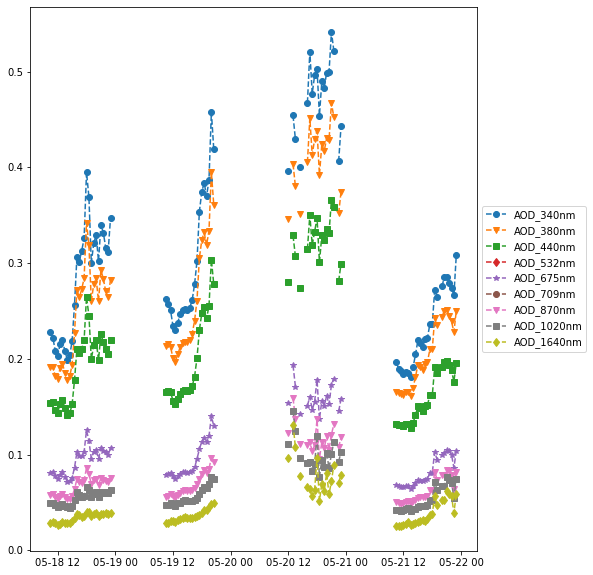

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

markers = itertools.cycle(('o', 'v', 's', 'd', '*')) 
for col in AOD.columns:
    ax.plot(AOD.index, AOD[col], label=f"{col}", linestyle='--', marker = next(markers))


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

---
#### Angstrom Exponent

TheÅngström Exponent (denoted as AE or α) is a measure of the spectral dependence of AOD.

It is related to particl size in that: values less that 1 suggest an dominance by coarse particles (e.g. dust, ash, sea spray), while values greater than 1 signal fine particls (e.g. smoke, industrical pollution).

## $\tau = \tau_{\lambda_o}(\lambda / \lambda_o)^{-\alpha}$

In [8]:
Ang = df.filter(like='_Angstrom_Exponent')
Ang = Ang.resample("30T").mean()
Ang.head()

,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent
Datetime,,,,,
2021-05-18 10:30:00,1.430152,1.489067,1.494753,1.410232,1.531882
2021-05-18 11:00:00,1.429179,1.469403,1.493163,1.410756,1.407368
2021-05-18 11:30:00,1.433405,1.466006,1.500926,1.415848,1.363088
2021-05-18 12:00:00,1.452408,1.484496,1.526158,1.433197,1.349926
2021-05-18 12:30:00,1.474338,1.492055,1.543927,1.459151,1.331261


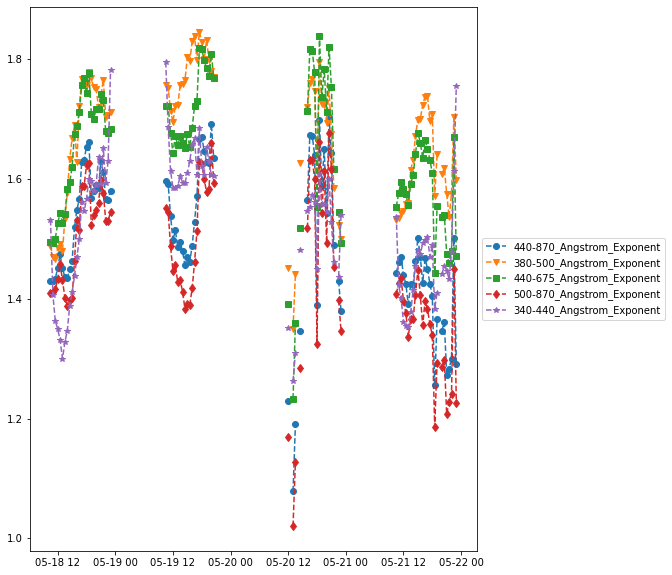

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

markers = itertools.cycle(('o', 'v', 's', 'd', '*')) 
for col in Ang.columns:
    ax.plot(Ang.index, Ang[col], label=f"{col}", linestyle='--', marker = next(markers))
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()